In [1]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import plotly.express as px
import plotly.graph_objects as go

In [3]:
start = dt.datetime(2019,10,17)
end = dt.datetime.now()

stocks = web.DataReader(['RSP', 'RYE', 'GLD', 'RYT','XRT','XLV'], 'yahoo', start, end)
stocks_close = pd.DataFrame(web.DataReader(['RSP', 'RYE', 'GLD', 'RYT','XRT','XLV'], 'yahoo', start, end)['Close'])
 
#RSP= Invesco S&P 500 Equal Weight ETF
#RYE = Invesco S&P 500® Equal Weight Energy ETF
#GLD= SPDR Gold Shares
#RYT = Invesco S&P 500 Equal Weight Technology ETF 
#XRT = SPDR S&P Retail ETF
#XLV = Health Care Select Sector SPDR Fund 


In [4]:
stocks_close

Symbols            RSP        RYE         GLD         RYT        XRT  \
Date                                                                   
2019-10-16  107.559998  42.660000  140.410004  180.119995  42.779999   
2019-10-17  107.970001  42.619999  140.610001  180.369995  43.330002   
2019-10-18  107.839996  42.380001  140.460007  178.720001  42.709999   
2019-10-21  108.660004  43.160000  139.789993  180.809998  43.220001   
2019-10-22  108.669998  43.919998  140.199997  178.860001  43.759998   
...                ...        ...         ...         ...        ...   
2021-12-30  162.750000  47.700001  169.800003  324.970001  90.860001   
2021-12-31  162.750000  47.770000  170.960007  324.029999  90.290001   
2022-01-03  162.889999  49.439999  168.330002  325.700012  91.580002   
2022-01-04  164.199997  51.439999  169.570007  324.660004  90.790001   
2022-01-05  161.669998  50.950001  169.059998  315.549988  87.730003   

Symbols            XLV  
Date                    
2019-10-16   91.419998  
2019-10-17   92.099998  
2019-10-18   91.760002  
2019-10-21   91.660004  
2019-10-22   91.860001  
...                ...  
2021-12-30  141.490005  
2021-12-31  140.889999  
2022-01-03  139.440002  
2022-01-04  137.600006  
2022-01-05  136.619995  

[561 rows x 6 columns]

In [15]:

def pct_change():
    stocks_close = pd.DataFrame(web.DataReader(['RSP', 'RYE', 'GLD','XRT','XLV'], 'yahoo', start, end)['Close'])
    pct_change = 100 * ((stocks_close-stocks_close.iloc[0])/stocks_close.iloc[0])
    return pct_change


In [16]:
pct_change()

Symbols           RSP        RYE        GLD         XRT        XLV
Date                                                              
2019-10-16   0.000000   0.000000   0.000000    0.000000   0.000000
2019-10-17   0.381186  -0.093767   0.142438    1.285655   0.743820
2019-10-18   0.260319  -0.656350   0.035612   -0.163627   0.371914
2019-10-21   1.022691   1.172058  -0.441571    1.028524   0.262531
2019-10-22   1.031983   2.953583  -0.149567    2.290789   0.481298
...               ...        ...        ...         ...        ...
2021-12-30  51.310900  11.814348  20.931557  112.388974  54.769206
2021-12-31  51.310900  11.978436  21.757711  111.056577  54.112888
2022-01-03  51.441059  15.893105  19.884622  114.072007  52.526805
2022-01-04  52.658982  20.581338  20.767754  112.225347  50.514120
2022-01-05  50.306807  19.432726  20.404525  105.072477  49.442133

[561 rows x 5 columns]

In [17]:
#convert func to dataframe  
results = pct_change()
results_df = pd.DataFrame(results)

In [14]:
results_df.isna().any()

Symbols
RSP    False
RYE    False
GLD    False
RYT    False
XRT    False
XLU    False
XLP    False
XLY    False
XLV    False
dtype: bool

In [9]:
results_df.dtypes

Symbols
RSP    float64
RYE    float64
GLD    float64
RYT    float64
XRT    float64
XLU    float64
XLP    float64
XLY    float64
XLV    float64
dtype: object

In [10]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 2019-10-16 to 2022-01-05
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RSP     561 non-null    float64
 1   RYE     561 non-null    float64
 2   GLD     561 non-null    float64
 3   RYT     561 non-null    float64
 4   XRT     561 non-null    float64
 5   XLU     561 non-null    float64
 6   XLP     561 non-null    float64
 7   XLY     561 non-null    float64
 8   XLV     561 non-null    float64
dtypes: float64(9)
memory usage: 43.8 KB


In [11]:
results_df.reset_index()

Symbols       Date        RSP        RYE        GLD        RYT         XRT  \
0       2019-10-16   0.000000   0.000000   0.000000   0.000000    0.000000   
1       2019-10-17   0.381186  -0.093767   0.142438   0.138796    1.285655   
2       2019-10-18   0.260319  -0.656350   0.035612  -0.777256   -0.163627   
3       2019-10-21   1.022691   1.172058  -0.441571   0.383079    1.028524   
4       2019-10-22   1.031983   2.953583  -0.149567  -0.699531    2.290789   
..             ...        ...        ...        ...        ...         ...   
556     2021-12-30  51.310900  11.814348  20.931557  80.418615  112.388974   
557     2021-12-31  51.310900  11.978436  21.757711  79.896740  111.056577   
558     2022-01-03  51.441059  15.893105  19.884622  80.823907  114.072007   
559     2022-01-04  52.658982  20.581338  20.767754  80.246509  112.225347   
560     2022-01-05  50.306807  19.432726  20.404525  75.188761  105.072477   

Symbols        XLU        XLP        XLY        XLV  
0         0.000000   0.000000   0.000000   0.000000  
1         0.252167   0.464035   0.262108   0.743820  
2         0.583135   0.662913   0.065527   0.371914  
3         0.977146   0.994363   0.417726   0.262531  
4         1.402672   1.027509  -0.221146   0.481298  
..             ...        ...        ...        ...  
556      12.419229  26.930719  67.851584  54.769206  
557      12.813240  27.792510  67.450249  54.112888  
558      11.694250  27.775934  72.258173  52.526805  
559      11.347519  28.637724  71.209767  50.514120  
560      11.284476  28.521715  66.590225  49.442133  

[561 rows x 10 columns]

In [12]:
results_df.describe()

Symbols         RSP         RYE         GLD         RYT         XRT  \
count    561.000000  561.000000  561.000000  561.000000  561.000000   
mean      17.892565  -13.202973   17.402229   33.605784   55.266264   
std       21.175438   21.584191    8.864833   26.619337   55.547464   
min      -33.376715  -60.736052   -2.421486  -22.373967  -36.909770   
25%        2.054666  -33.966244   14.251117   10.959364    4.534835   
50%       14.243213   -5.977495   18.866170   32.467251   40.439466   
75%       39.931199    4.055320   23.410009   57.783711  116.058913   
max       52.658982   21.589309   38.088451   81.850986  143.478276   

Symbols         XLU         XLP         XLY         XLV  
count    561.000000  561.000000  561.000000  561.000000  
mean      -0.200729    8.831033   25.957857   23.359273  
std        6.415736    8.543608   23.933433   15.401327  
min      -29.188338  -19.406694  -28.372512  -18.376718  
25%       -4.286842    3.165396    3.636664   11.332313  
50%        0.394011    8.452109   27.635356   21.242615  
75%        4.192277   16.224722   45.671236   36.403412  
max       12.813240   28.637724   73.167339   54.769206

<AxesSubplot:>

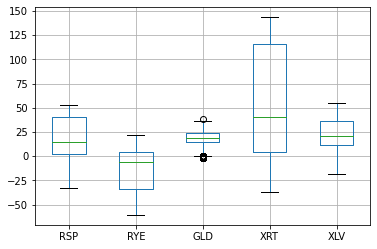

In [18]:
results_df.boxplot()

In [11]:
import pandas_profiling

In [12]:
from pandas_profiling import ProfileReport
prof = ProfileReport(results_df)
prof.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
prof

#export to csv
results_df.to_csv('results.csv', index=False)

#export to excel
file_name='results_df.xlsx'
results_df.to_excel(file_name)